# Case Study: 4 -  Bankruptcy

#### Alexander Sepenu
#### Nnenna Okpara
#### Taifur Chowdhury
#### Juan Edgar Nunez - Gonzalez



# Business Understanding

**Objective:**

For this case study, we build classification models that predict if a company will enter bankruptcy. Our objective is to use Random Forest and XGBoost to predict bankruptcy accurately.

# Data Evaluation

The finance department provided five separate “.arff” files for five years. Then, the team combined the data into a single data frame. It consists of 64 attributes and 43,405 rows from over 10,000 different companies for five years. The target feature is heavily imbalanced because, from the class variable, only about 5% of the company filed for bankruptcy. 

**Missing data:**

The data has missing values. Our input attributes are formatted as object datatypes since values are all metrics. Based on visual inspection, most of the features in the dataset have missing values. Features like ` net profit / inventory`, ` sales / inventory`, ` profit on operating activities / financial expenses`, ` sales (n) / sales (n-1)`, and ` (current assets - inventories) / long-term liabilities` are the ones with most missing values. One common aspect of all these features is that data are highly skewed. For that reason, the missing values for each feature were imputed using the median. 

**Features Importance:** 

We have built two sets of features importance using Random Forest and XGBoost. For Random Forest, we have two lists of feature importance – one with Gini criterion and another one with Entropy criterion. Most of the metrics all have to do with profitability.

**Below are the top 20 features based on Random Forest - Gini criterion using .20 threshold**

Attr 4 - current assets / short-term liabilities
Attr 5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
Attr 8 - book value of equity / total liabilities
Attr 15 - (total liabilities * 365) / (gross profit + depreciation)
Attr 23 - net profit / sales
Attr 25 - (equity - share capital) / total assets
Attr 26 - (net profit + depreciation) / total liabilities
Attr 28 - working capital / fixed assets
Attr 33 - operating expenses / short-term liabilities
Attr 34 - operating expenses / total liabilities
Atrr 38 - constant capital / total assets
Attr 39 - profit on sales / sales
Attr 40 - (current assets - inventory - receivables) / short-term liabilities
Attr 41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))
Attr 43 - rotation receivables + inventory turnover in days
Attr 45 - net profit / inventory
Attr 54 - constant capital / fixed assets
Attr 55 - working capital
Attr 57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
Attr 60 - sales / inventory

**Below are the top 20 features based on Random Forest - Entropy criterion using .20 threshold**

Attr 4 - current assets / short-term liabilities
Attr 5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
Attr 8 - book value of equity / total liabilities
Attr 12 - gross profit / short-term liabilities
Attr 15 - (total liabilities * 365) / (gross profit + depreciation)
Attr 21 - sales (n) / sales (n-1)
Attr 23 - net profit / sales
Attr 24 - gross profit (in 3 years) / total assets
Attr 25 - (equity - share capital) / total assets
Attr 26 - (net profit + depreciation) / total liabilities
Attr 28 - working capital / fixed assets
Attr 33 - operating expenses / short-term liabilities
Attr 34 - operating expenses / total liabilities
Attr 37 - (current assets - inventories) / long-term liabilities
Attr 38 - constant capital / total assets
Attr 39 - profit on sales / sales
Attr 40 - (current assets - inventory - receivables) / short-term liabilities
Attr 41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))
Attr 55 - working capital
Attr 57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

**Below are the top features for XGBoost using .20 threshold**

Attr 5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
Attr 6 - retained earnings / total assets
Attr 13 - (gross profit + depreciation) / sales
Attr 26 - (net profit + depreciation) / total liabilities -> Primary driver
Attr 27 - profit on operating activities / financial expenses
Attr 34 - operating expenses / total liabilities
Attr 35 - profit on sales / total assets
Attr 39 - profit on sales / sales
Attr 42 - profit on operating activities / sales
Attr 44 - (receivables * 365) / sales
Attr 56 - (sales - cost of products sold) / sales
Attr 58 - total costs /total sales



**Assumptions:**

Given the imbalanced output feature, we believe most companies will not be bankrupt. However, if some companies go bankrupt, we know from the feature importance that companies with these attributes are likely to file for bankruptcy.

In [41]:
# Import Libraries

import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import time
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")



https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [2]:
# Define dataframe

df = pd.read_csv('complete_dataset.csv')

In [3]:
#Dataframe Dimension should equal (88-81) 169 columns and 21,263 rows
df.shape

(43405, 65)

In [4]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [5]:
#Checking for null values in all the features

print(df.isnull().sum())

Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64


In [6]:
# Replace null values with median values

column_median = df.median()
df = df.fillna(column_median)

In [7]:
# Making sure there is no missing value
print(df.isnull().sum())

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64


### EDA and Visualization

0    0.951826
1    0.048174
Name: class, dtype: float64

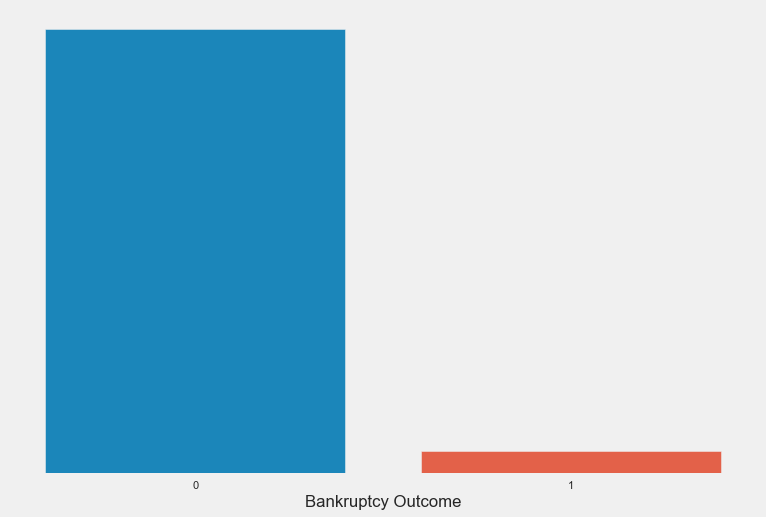

In [13]:
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
sns.countplot(y)
plt.xlabel('Bankruptcy Outcome')
plt.ylabel('')
plt.yticks([])
y.value_counts(normalize=True)

In [125]:
#Create Profile For EDA 

profile = ProfileReport(df, title="Profiling Report", explorative=True)

In [ ]:
# this line of code does an in depth EDA but take about 4 hours to complete depend on computing power
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [129]:
# this line of code saves the results into your working directory which you can open in your brower to learn more about the data
profile.to_file('Bankruptcy.html')


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [166]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

TraitError: n_rows and n_columns must be positive integer

In [130]:
# Print 'EDA output in local default drive'
temp_report = sv.analyze(df)
#display the report
temp_report.show_html('Bankruptcy.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Bankruptcy.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
#Define Input and Output

y = df_model['class']
X = df_model.loc[:, df_model.columns!='class']


# Modeling Preparations:

With Random Forest, we used feature selection during EDA to identify the top 20 most influential features in our model preparation. Two exemplary preparation methods. The first step is to use Random Forests to establish a model performance baseline. We then used Cross-Validation for model selection. We used Cross-Validation with shuffle-split because our data is very unbalanced. We are using the precision score of these models to determine which one has a higher classification performance. After rigorous experimentation with the hyperparameters in Random Forest and Cross-Validation, we determined that Random Forest provided the highest precision score, and the performance increased as the maximum depth increased. The higher classification precision demonstrated by Random-Forest makes it more suitable to predict companies’ bankruptcies in this dataset.

We configured XGBoost with three different sets of parameters. In Option 2 we increased the max_dept from 6 to 10, which increased the score performance, colsample_bytree and subsample were lowered from 1, the default to 0.6 to improve the overfitting.

### Fearture Selection for Random Forest Model

#### Gini Criterion:

In [14]:
# Create Random Forest Model using Gini criterion for feature selection
rf_model_gini = rf(n_estimators = 50, criterion = 'gini', max_features = 'auto', max_depth = 10)

rf_model_gini.fit(X,y)
start_time = time.time()
importances = rf_model_gini.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_gini.estimators_], axis=0)
elapsed_time = time.time() - start_time

feature_names = [f"feature {i}" for i in range(X.shape[1])]

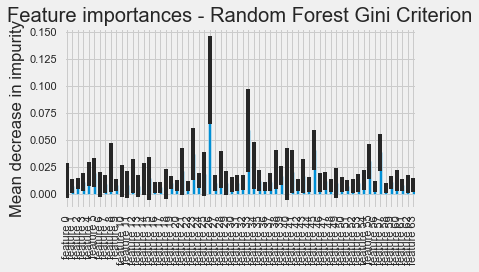

In [18]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances - Random Forest Gini Criterion")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [19]:
# Top 20 Features of Random Forest Models
important_features_dict = {}
for idx, val in enumerate(rf_model_gini.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'20 most important features: {important_features_list[:20]}')

20 most important features: [26, 33, 45, 57, 23, 55, 34, 8, 28, 38, 21, 41, 5, 40, 4, 25, 39, 43, 12, 15]


In [20]:
top_20_gini_rf = X[['Attr4','Attr5','Attr8','Attr15','Attr23','Attr25','Attr26','Attr28','Attr33','Attr34','Attr38','Attr39','Attr40','Attr41','Attr43', 'Attr45','Attr54','Attr55','Attr57', 'Attr60']]

**Visualize Top 20 Features based Gini Criterion:**

In [28]:
# Define Random Forest Gini Criterion for Top 20 Features

rf_model_gini_20 = rf(n_estimators = 50, criterion = 'gini', max_features = 'auto', max_depth = 10)
rf_model_gini_20.fit(top_20_gini_rf,y)

start_time = time.time()
importances = rf_model_gini_20.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_gini_20.estimators_], axis=0)
elapsed_time = time.time() - start_time

feature_names = [f"feature {i}" for i in range(top_20_gini_rf.shape[1])]

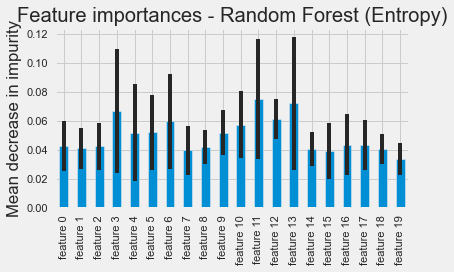

In [29]:
# Define Feature Importance 

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances - Random Forest (Entropy)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### The following features are the top features using Random Forest Gini criterion:

current assets / short-term liabilities

[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

book value of equity / total liabilities

**(total liabilities * 365) / (gross profit + depreciation)**

net profit / sales

(equity - share capital) / total assets

(net profit + depreciation) / total liabilities

working capital / fixed assets

operating expenses / short-term liabilities

operating expenses / total liabilities

constant capital / total assets

**profit on sales / sales**

(current assets - inventory - receivables) / short-term liabilities

**total liabilities / ((profit on operating activities + depreciation) * (12/365))**

rotation receivables + inventory turnover in days

net profit / inventory

constant capital / fixed assets

working capital

(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

sales / inventory

**NOTE : bolded features are most important features for the model**

### Random Forest - Entropy

In [30]:
# Create Random Forest Model using Entropy criterion for feature selection

import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier as rf

rf_model_entropy = rf(n_estimators = 50, criterion = 'entropy', max_features = 'auto', max_depth = 10)
rf_model_entropy.fit(X,y)
start_time = time.time()
importances = rf_model_entropy.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_entropy.estimators_], axis=0)
elapsed_time = time.time() - start_time

feature_names = [f"feature {i}" for i in range(X.shape[1])]

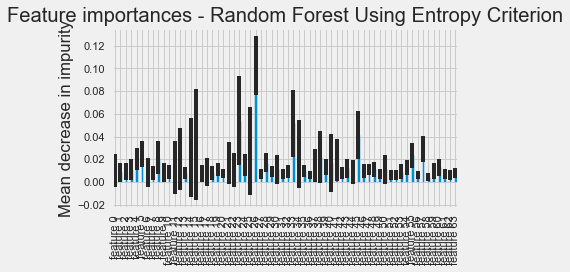

In [31]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances - Random Forest Using Entropy Criterion")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [32]:
# Top 20 Features of Random Forest Models
important_features_dict = {}
for idx, val in enumerate(rf_model_entropy.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'20 most important features: {important_features_list[:20]}')


20 most important features: [26, 23, 33, 45, 15, 57, 25, 34, 5, 55, 38, 8, 14, 4, 12, 41, 28, 21, 40, 24]


In [33]:
top_20_entropy_rf = X[['Attr4','Attr5','Attr8','Attr15','Attr23','Attr25','Attr26','Attr28','Attr33','Attr34','Attr38','Attr40','Attr41','Attr45','Attr55','Attr57', 'Attr12', 'Attr21', 'Attr24', 'Attr37']]

**Visualize Top 20 Features based Entropy Criterion:**

In [34]:
# Create Random Forest Model using Entropy criterion for feature selection

rf_model_entropy_20 = rf(n_estimators = 50, criterion = 'entropy', max_features = 'auto', max_depth = 10)

rf_model_entropy_20.fit(top_20_entropy_rf,y)

start_time = time.time()
importances = rf_model_entropy_20.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_entropy_20.estimators_], axis=0)
elapsed_time = time.time() - start_time

feature_names = [f"feature {i}" for i in range(top_20_entropy_rf.shape[1])]

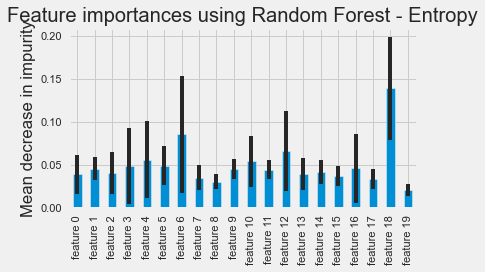

In [35]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using Random Forest - Entropy")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### The following features are the top features using Random Forest entropy criterion:

current assets / short-term liabilities

[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

book value of equity / total liabilities

gross profit / short-term liabilities

(total liabilities * 365) / (gross profit + depreciation)

sales (n) / sales (n-1)

**net profit / sales**

gross profit (in 3 years) / total assets

(equity - share capital) / total assets

(net profit + depreciation) / total liabilities

working capital / fixed assets

operating expenses / short-term liabilities

operating expenses / total liabilities

(current assets - inventories) / long-term liabilities

constant capital / total assets

profit on sales / sales

(current assets - inventory - receivables) / short-term liabilities

total liabilities / ((profit on operating activities + depreciation) * (12/365))

**working capital**

(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)


**NOTE : bolded features are most important features for the model**

### Feature Selection Using XGBoost

[20:25:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.00620563 0.00436595 0.01797446 0.01742199 0.03759385 0.03390628
 0.01149845 0.01022573 0.00998614 0.00716161 0.01297371 0.00523306
 0.02169521 0.         0.00747177 0.00929813 0.0036606  0.00479954
 0.01983963 0.01853355 0.0179518  0.01971488 0.00791189 0.01463925
 0.01626234 0.09279275 0.03342793 0.00726809 0.01087616 0.01242976
 0.00783914 0.01409328 0.01672684 0.059732   0.02267195 0.01023163
 0.00760813 0.01500567 0.0231678  0.01412482 0.01916288 0.0240935
 0.00631438 0.03396486 0.00755013 0.0196184  0.01311134 0.01209641
 0.00912385 0.00879185 0.00904724 0.00782751 0.00889928 0.00958802
 0.010488   0.03246421 0.00643359 0.0

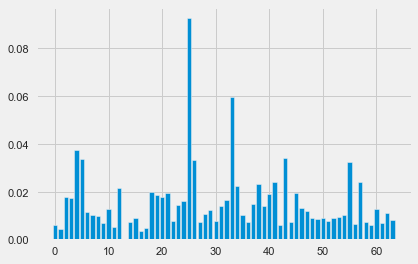

In [42]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot


model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()


Using 0.02 as threshold, the following are the top features for XGBoost model:

5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

6 - retained earnings / total assets

13 - (gross profit + depreciation) / sales

**26 - (net profit + depreciation) / total liabilities** -> Primary driver  

27 - profit on operating activities / financial expenses

34 - operating expenses / total liabilities

35 - profit on sales / total assets

39 - profit on sales / sales

42 - profit on operating activities / sales

44 - (receivables * 365) / sales

56 - (sales - cost of products sold) / sales

58 - total costs /total sales

# Model Building

The primary goal of this study is to build a Random Forest and an XGBoost model to predict bankruptcy accurately and will involve the following steps: Specify in the sample, the model analysis, and performance.
The target variable for this dataset is the “class” variable for which the sub-class group is “0” which is companies not going bankrupt, and “1” for companies going bankrupt. As seen from the EDA process, 95% of the target response are companies that are not going bankrupt, while 0.05% are companies that are likely to go bankrupt. Based on this information, the task here is to use two modeling techniques to classy which of the two classes a company is likely to be classified bankrupt or not. 

The first step is to do a feature selection using Random Forest. This was done using the Gini and Entropy criteria. The two criteria used 50 estimators and a maximum depth of 10 to select the best features for onward analysis. The top 20 were sorted, and these are seen below in the notebook output. On the other hand, the entropy technique also gave a different output compared to that of the Gini approach. A 0.02 threshold was set for the top 20 features with their outcome in the cell below. The two were cross-referenced to weigh similarities. The differences were not that wide.

On using the XGBoost technique, the feature selection was made, and the output was analyzed. The output was compared to that of Random Forest. A 0.02 threshold was set for the top 20 features with their outcome in the cell below. This was also not significantly different from the random forest. The outcomes from the random forest were used for the onward model building.

**Scaling the dataset**

Given the data as learned from the EDA is heavily skewed, the data from the selected features to be used for model building were scaled using the Robust Scaler from sklearn. This centralizes the distribution of the dataset to have some type of balance within the dataset. An 80% - 20% train-test- split was used to split the selected features from the random forest output to build a comparative model.
An iterative search was done on the Random Forest model to find the sweet spot for models’ performance to not underfit or not overfit when choosing the max depth. It was seen that the best estimators fall between 10 and 20, for which 15 maximum depths will be used for final model building using cross-validation. It is worth noting that the deeper the tree, performance increases; hence the model tends to overfit; it is for this reason that 15 was chosen.
We then proceed with these chosen parameters for the Random Forest analysis to compare the XGBoost with.

On using XGBoost, the default values for maximum depth of 6 were used and also for subsample = 1, colsample = 1, n_estimtors = 100 all were used as a baseline to measure model performance. It was realized that the baseline model though, gave a 98.79%, the best performance for this approach was option number 2 with the highest performance at 98.80% that has maximum depth of 10 was used and also for subsample = 0.6, colsample = 0.6, n_estimtors = 50. This was because when you increase the depth, the performance suffers with the default values for subsmaple, colsample and number estimators hence these have to be reduced. This improves overfitting. 
 On the other hand, when tested with a maximum depth when the opposite is done by reducing the maximum depth and increasing subsample and colsample, the performance dips to 97.49% and number of estimators at 150.
The best-performing parameters are then chosen for the XGBoost model to compare with the Random Forest model while varying the learning rate. A n iteration was done on the learning rate was analyzed in the range of (0.01, 0.1, 0.2, 0.3, 0.4, 0.7). From these ranges, the best approach was with 0.01 learning rate. This was preferred because, learning rate determines the step of each iteration while the model optimizes toward the objective. This means that a lower learning rate reduces the computational power required to achieve the lower rate computations, thereby reducing the residual error while optimizing the chance of the model reaching its best performance.  

In comparison, random forest accuracy was 95%, and that for XGBoost is 97%. That said, XGBoost is the preferred model of choice to analysis predict if a company is likely to file for bankruptcy or not.

### Random Forest (Not Scaled)

Increasing learing rate, n_estimator, subsample, and max depth produce accuracy rate close to 1. That means the model may overfit the data which we are trying to avoid. 

Source: https://medium.com/towards-data-science/xgboost-fine-tune-and-optimize-your-model-23d996fab663

## Model Building (Scaled)

#### Random Forest

In [66]:
# Define top features for model building 

top_features_RF = X[['Attr4','Attr5','Attr8','Attr15','Attr23','Attr25','Attr26','Attr28','Attr33','Attr34','Attr38','Attr39','Attr40','Attr41','Attr43', 'Attr45','Attr54','Attr55','Attr57', 'Attr60', 'Attr12', 'Attr21', 'Attr24', 'Attr37']]

In [154]:
# Scale X and y for model building 

from sklearn.preprocessing import RobustScaler


y1 = df_model['class']
#X1 = df_model.loc[:, df_model.columns!='class']

transformer = RobustScaler().fit(top_features_RF)
X_1_scaled = transformer.transform(top_features_RF)
X_1_scaled



X_train, X_test, y_train, y_test = train_test_split(X_1_scaled, y1, test_size=0.20, random_state=42)

In [143]:
# Buiilding the random forest model 
from sklearn.ensemble import RandomForestClassifier as rf

for i in range(1,20):

    rf_model_scaled = rf(n_estimators = 50, criterion = 'entropy', max_features = 'auto', max_depth = i)

    rf_model_scaled.fit(X_train,y_train)

    print(i,rf_model_scaled.score(X_train, y_train))

1 0.9515608800829397
2 0.9515608800829397
3 0.9515608800829397
4 0.9515608800829397
5 0.9515608800829397
6 0.9515608800829397
7 0.9515608800829397
8 0.9518488653380947
9 0.9522808432208271
10 0.9532599930883539
11 0.9558518603847483
12 0.9577525630687709
13 0.9602580347886188
14 0.9645778136159429
15 0.970769496601774
16 0.9759532311945628
17 0.9835848404561687
18 0.9873286487731828
19 0.9920516069577238


[0.94917207 0.95061195 0.94917207 0.94931605 0.95320374 0.95205184
 0.95406767 0.94787617 0.94816415 0.95104392]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8272
           1       0.05      0.00      0.00       409

    accuracy                           0.95      8681
   macro avg       0.50      0.50      0.49      8681
weighted avg       0.91      0.95      0.93      8681



<AxesSubplot:>

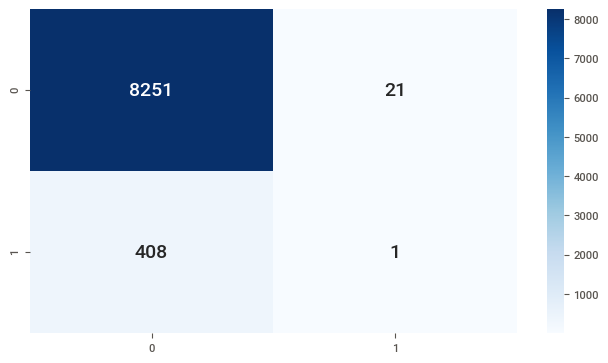

In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

rf_model_scaled_final = rf(n_estimators = 50, criterion = 'entropy', max_features = 'auto', max_depth = 15)

rf_model_scaled_final.fit(X_train,y_train)

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
print(cross_val_score(rf_model_scaled_final, X_train, y_train, cv = cv, scoring = 'accuracy'))
y_pred = rf_model_scaled_final.predict(X_test)
plt.figure(figsize=(7,4))
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d',cmap="Blues")

# https://stats.stackexchange.com/questions/392115/why-is-cross-val-score-substantially-lower-than-score-or-roc-auc-score

### XGBoost Model Building

**Define Dataframe and Transform Input Variables**

In [156]:
#Define Top Input Variables for XGBoost

xgboost_X = X[['Attr5', 'Attr6', 'Attr13', 'Attr26','Attr27', 'Attr34', 'Attr35', 'Attr39', 'Attr42','Attr44','Attr56','Attr58']]

In [151]:
# Robust Scale X and y for model building 

from sklearn.preprocessing import RobustScaler
y2 = df_model['class']
#X1 = df_model.loc[:, df_model.columns!='class']
transformer = RobustScaler().fit(xgboost_X)
X_2_scaled = transformer.transform(xgboost_X)
X_2_scaled
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_2_scaled, y2, test_size=0.20, random_state=42)

#### XGBoost Model Building With Different Hyperparameter Tuned Options 

**Option 1: With Default Tuned Parameters**

0.9879334178090082


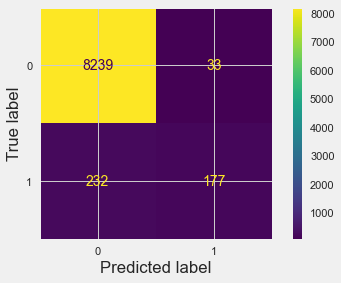

In [114]:
# Model Building with no hyper parameter tuning
xg_model = XGBClassifier(verbosity = 0, random_state=42) #default max_depth = 6, subsample = 1, colsample = 1, n_estimtors = 100
xg_model.fit(X_train, y_train)
print(xg_model.score(X_train, y_train))
plot_confusion_matrix(xg_model, X_test, y_test)
plt.show()

**Option 2: Increased Max Depth, Lower Subsample Trees, and Lower n_estimators**

0.9879622163345236


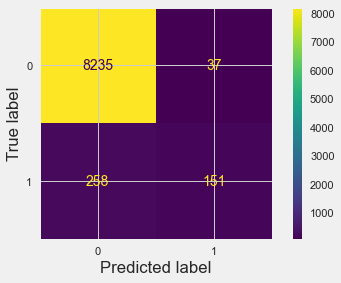

In [111]:
xg_model_scaled = XGBClassifier(max_depth = 10, subsample = .6, colsample_bytree = .6, n_estimators = 50,objective ='reg:linear', verbosity = 0, random_state=42)
xg_model_scaled.fit(X_train, y_train)
print(xg_model_scaled.score(X_train, y_train))
plot_confusion_matrix(xg_model_scaled, X_test, y_test)
plt.show()

**Option 3: Lowered Max Depth, Increaseed Subsample, and Increased n_estimators**

0.9748876857504896


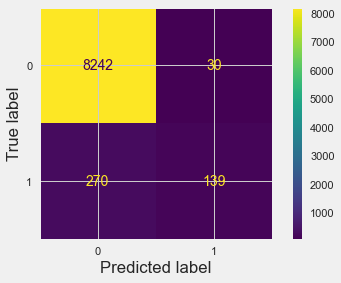

In [119]:
xg_model_scaled = XGBClassifier(max_depth = 4, subsample = .8, colsample_bytree = .7, n_estimators = 150, objective ='reg:linear', verbosity = 0, random_state=42)
xg_model_scaled.fit(X_train, y_train)
print(xg_model_scaled.score(X_train, y_train))
plot_confusion_matrix(xg_model_scaled, X_test, y_test)

In [157]:
# Proceeding with Option 2 since it produced better accuracy score. Final step is to cross validate using shuffle split.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix

xg_model_scaled = XGBClassifier(max_depth = 10, subsample = .6, colsample_bytree = .6, n_estimators = 50,objective ='reg:linear', verbosity = 0, random_state=42)
xg_model_scaled.fit(X_train, y_train)
for i in [.01, .1, .2, .3, .4,.7]: #.3 is default learning rate
    xg_model_scaled.learning_rate = i
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    print(i,cross_val_score( xg_model_scaled, X_train, y_train, cv = cv, scoring = 'accuracy'))
    y_pred =  xg_model_scaled.predict(X_test)
    #plt.figure(figsize=(7,4))
    print(1 * "\n")
    #print(classification_report(y_test, y_pred))
    #print(1 * "\n")
    #cf_matrix = confusion_matrix(y_test, y_pred)
    #sns.heatmap(cf_matrix, annot=True, fmt='d',cmap="Blues")

0.01 [0.95075594 0.95161987 0.95046796 0.95017999 0.95363571 0.95392369
 0.95435565 0.94902808 0.94902808 0.9511879 ]


0.1 [0.95032397 0.95075594 0.950036   0.94974802 0.95262779 0.95089993
 0.95363571 0.94816415 0.94845212 0.94946004]


0.2 [0.94686825 0.94845212 0.94902808 0.94787617 0.950036   0.94917207
 0.95046796 0.94514039 0.94758819 0.94902808]


0.3 [0.94614831 0.9462923  0.94586033 0.9462923  0.94557235 0.94586033
 0.94931605 0.94168467 0.94427646 0.94442045]


0.4 [0.93851692 0.94269258 0.93664507 0.93866091 0.94269258 0.94312455
 0.94355652 0.93808495 0.94240461 0.93851692]


0.7 [0.92742981 0.92886969 0.91965443 0.92339813 0.92771778 0.92598992
 0.92483801 0.92311015 0.92685385 0.92570194]




Model score is:  0.9706831010252275


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8272
           1       0.97      0.28      0.44       409

    accuracy                           0.97      8681
   macro avg       0.97      0.64      0.71      8681
weighted avg       0.97      0.97      0.96      8681



<AxesSubplot:>

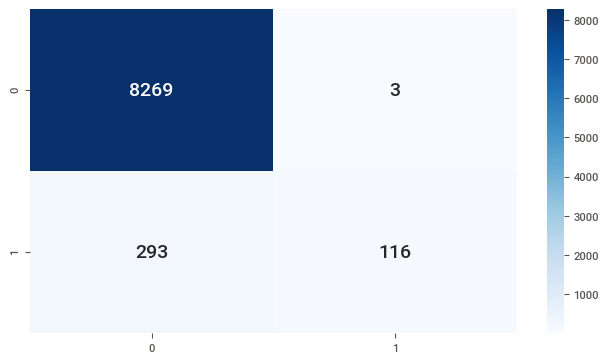

In [163]:
#Create Final Model for XGBoost based on the learning rate performnace from crossvalidation run (previous run):

xg_model_scaled_final = XGBClassifier(learning_rate = .01, max_depth = 10, subsample = .6, colsample_bytree = .6, n_estimators = 50,objective ='reg:linear', verbosity = 0, random_state=42)
xg_model_scaled_final.fit(X_train, y_train)
print('Model score is: ', xg_model_scaled_final.score(X_train, y_train))
y_pred =  xg_model_scaled.predict(X_test)
plt.figure(figsize=(7,4))
print(1 * "\n")
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d',cmap="Blues")


# Model Interpretation

### Random Forest - Feature Importance

[0.03241959 0.04312093 0.03501202 0.04032505 0.04232992 0.04414049
 0.0518842  0.03313454 0.03408834 0.04130688 0.04797505 0.05689226
 0.04028416 0.05004743 0.03287282 0.03606358 0.03919937 0.04046097
 0.0350222  0.03257203 0.03958217 0.03556445 0.0918308  0.02387075]


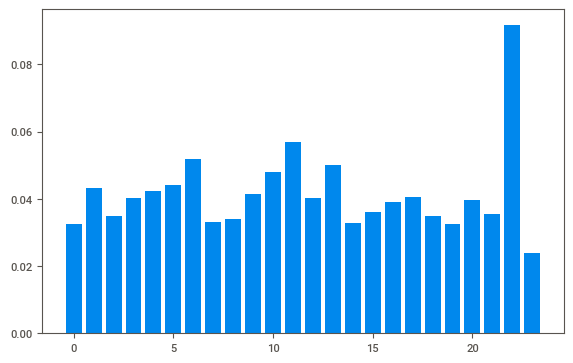

In [155]:
# Split dataset

X_train, X_test, y_train, y_test = train_test_split(X_1_scaled, y1, test_size=0.20, random_state=42)

# Build Model For Feature Evaluation

rf_model_scaled_final = rf(n_estimators = 50, criterion = 'entropy', max_features = 'auto', max_depth = 15)
rf_model_scaled_final.fit(X_train,y_train)

# feature importance
print(rf_model_scaled_final.feature_importances_)

# plot
pyplot.bar(range(len(rf_model_scaled_final.feature_importances_)), rf_model_scaled_final.feature_importances_)
pyplot.show()

These are the top three important features for Random Forest Model:

(net profit + depreciation) / total liabilities

profit on sales / sales

gross profit (in 3 years) / total assets


Given this model, `(net profit + depreciation) / total liabilities` is the most important variable followed by `profit on sales / sales` and `gross profit (in 3 years) / total assets`. These features indicate that if a company performes poorly with profitability scores then it may go banktrupt. Third feeature indicates that there is a three year window for chances of failing as a company due to low profit/total asset ratio. These findings can be very important for internal analysts, investment banks, and CFO of the companies. 

### XGBoost - Feature Importance

[0.05302653 0.06644343 0.05538262 0.06667134 0.12554161 0.14155464
 0.08514307 0.0783266  0.08080743 0.04213603 0.10924395 0.0957227 ]


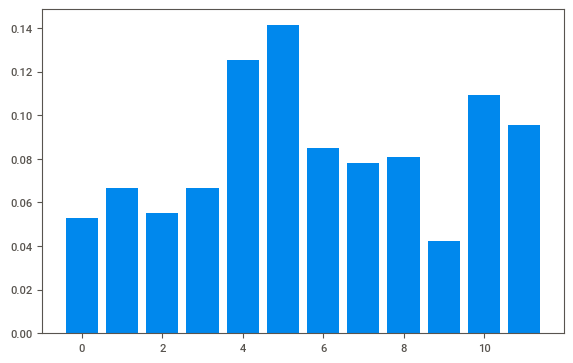

In [159]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

#Split Dataframe
X_train, X_test, y_train, y_test = train_test_split(X_2_scaled, y2, test_size=0.20, random_state=42)

#Build Model For Feature Importance Evaluation

xg_model_scaled = XGBClassifier(learning_rate = .01,max_depth = 10, subsample = .6, colsample_bytree = .6, n_estimators = 50,objective ='reg:linear', verbosity = 0, random_state=42)
xg_model_scaled.fit(X_train, y_train)

# feature importance
print(xg_model_scaled.feature_importances_)

# plot
pyplot.bar(range(len(xg_model_scaled.feature_importances_)), xg_model_scaled.feature_importances_)
pyplot.show()

Top featuers for XGBoost Model:


1. operating expenses / total liabilities
2. [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
3. sales - cost of products sold) / sales


Given this model, `operating expene/ total liablities` is the most important variable followed by `sales - cost of products sold) / sales` and `[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365`. These features indicate that if a company has poor performance with operation, low on short term assets, and poor performance on gross profit then it will face the risk of bankruptcy. These findings can be very important for internal analysts, investment banks, and CFO of the companies. 

# Conclusion

The XGBoost model displays the best performance by tuning to improve the accuracy score. We recommend this model using the following hyperparameters settings:

learning_rate = .01

max_depth = 10

subsample = .6

colsample_bytree = .6

n_estimators = 50

With these hyperparameter settings, the model has produced acccuracy score of 97%. This model provides us a list of important features which can assist a company's finance department, investment banks, and investors in predicting its  chances of going bankrupt. 
